# Assignment 2

## 1. Importing data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import pandoc

dset = xr.open_dataset('./data/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc')

In [1]:
!export PATH=/Library/TeX/texbin:$PATH

## 2. Exploring the Data

1. Inspect the contents of the netCDF ﬁle using dset.

In [33]:
dset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 780)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time       (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               Amon
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/a54fe2f4-0a68-4420-8702-36750bde9b05
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

2. Which variables does the netCDF contain? Execute the dset.variables.keys() com-
mand to print the names of the variables.

In [5]:
dset.variables.keys()

KeysView(Frozen({'bnds': <xarray.IndexVariable 'bnds' (bnds: 2)>
array([1., 2.])
Attributes:
    long_name:  vertex number, 'height': <xarray.Variable ()>
[1 values with dtype=float64]
Attributes:
    long_name:      height
    units:          m
    cell_methods:   time: point
    axis:           Z
    positive:       up
    standard_name:  height
    description:    ~2 m standard surface air temperature and surface humidit..., 'lat': <xarray.IndexVariable 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22

The variables are:

- bnds
- height
- lat
- lat_bnds
- lon
- lon_bnds
- tas
- time
- time_bnds

3. Access the air temperature variable using dset[’tas’]. What are the dimensions of the
air temperature variable?

In [10]:
dset.variables['tas'].shape

(780, 180, 288)

4. What kind of data is this: raster, vector, or point?

As it is a grid of values, this data is a raster file.

5. What is the data type of the air temperature variable: integer, single, or double? Find out using the command dset[’tas’].dtype.

In [11]:
dset.variables['tas'].dtype

dtype('float32')

6. Is this the optimal data type for air temperature data?

'float32' can accurately represent temperature variations down to small fractions of a degree, which is typically adequate for climate and weather data.

7. What is the temporal span of each netCDF ﬁle?

In [18]:
dset.variables['time'][0], dset.variables['time'][-1]

(<xarray.Variable ()>
 array(cftime.DatetimeNoLeap(1950, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       dtype=object)
 Attributes:
     long_name:      time
     axis:           T
     calendar_type:  noleap
     bounds:         time_bnds
     standard_name:  time
     description:    Temporal mean,
 <xarray.Variable ()>
 array(cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True),
       dtype=object)
 Attributes:
     long_name:      time
     axis:           T
     calendar_type:  noleap
     bounds:         time_bnds
     standard_name:  time
     description:    Temporal mean)

The temporal span is 64 years

8. What are the units of the air temperature data?

In [19]:
dset.variables['tas']

<xarray.Variable (time: 780, lat: 180, lon: 288)>
[40435200 values with dtype=float32]
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

Temperature units are Kelvin

9. What is the spatial and temporal resolution of the air temperature data?

In [35]:
# Latitude
dset['lat'].diff(dim='lat')

<xarray.DataArray 'lat' (lat: 179)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -88.5 -87.5 -86.5 -85.5 -84.5 ... 86.5 87.5 88.5 89.5

In [36]:
# Longitude
dset['lon'].diff(dim='lon')

<xarray.DataArray 'lon' (lon: 287)>
array([1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25])
Coordinates:
    height   float64 ...
  * lon      (lon) float64 1.875 3.125 4.375 5.625 ... 355.6 356.9 358.1 359.4

In [40]:
dset['time'][:30]

<xarray.DataArray 'time' (time: 30)>
array([cftime.DatetimeNoLeap(1950, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 7, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 12, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 7, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 12, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 6, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 ...
  * time     (time) object 1950-01-16 12:00:00 ... 1952-06-16 00:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  noleap
    bounds:         time_bnds
    standard_name:  time
    description:    Temporal mean

As shown above the time resolution is 1 month.

10. What is the spatial projection of the air temperature data?

11. What is the meaning of ssp in the ﬁle names?

The acronym "SSP" in file names, especially in the context of climate model outputs, stands for "Shared Socioeconomic Pathways." SSPs are used in climate research to project the impact of different future scenarios on climate change. They represent various pathways the world could take in terms of socioeconomic development, including factors like population growth, economic development, and energy consumption, which in turn influence greenhouse gas emissions.

12. What type of model does the data originate from: physically-based, conceptual, data-
driven, hybrid, or other?

The data originates from a physically-based model, specifically from a climate model known as GFDL-ESM4. The GFDL-ESM4 (Geophysical Fluid Dynamics Laboratory Earth System Model version 4) is a comprehensive, state-of-the-art climate model developed by NOAA's Geophysical Fluid Dynamics Laboratory (GFDL). It incorporates complex physical, chemical, and biological processes to simulate the Earth's climate system. This type of model is designed to understand and predict climate changes by integrating atmospheric, oceanic, land surface, and cryospheric components along with the interactions between them and human activities. Source: https://www.gfdl.noaa.gov/earth-system-esm4/

## 3. Creation of Climate Change Maps

1. Calculate the mean air temperature map for 1850–1900 (also known as the pre-industrial
period) using the command:

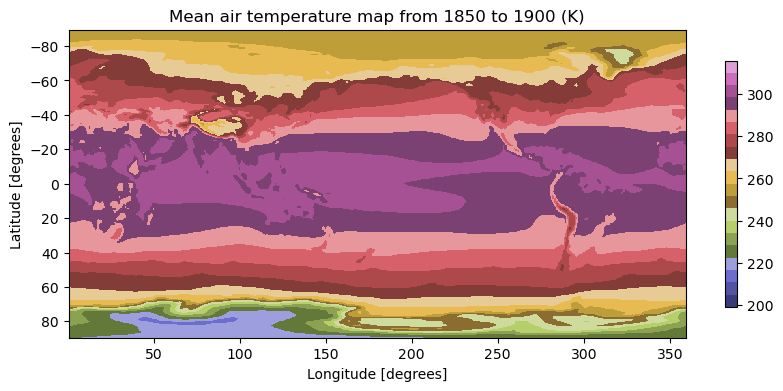

In [103]:
dset = xr.open_dataset('./data/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc')
mat1 = np.mean(dset['tas'].sel(time=slice('18500101', '19001231')), axis=0)
plt.figure(figsize=(10,4))
# plt.imshow(mat1, cmap='jet', vmin=199, vmax=316, 
plt.imshow(mat1, cmap='tab20b', vmin=199, vmax=316, 
           extent=[min(dset['lon'].values),
                  max(dset['lon'].values), 
                  min(dset['lat'].values),
                  max(dset['lat'].values)])
plt.gca().invert_yaxis()
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Mean air temperature map from 1850 to 1900 (K)')
plt.colorbar(shrink=0.8)

In [63]:
dset.min(), dset.max()

(<xarray.Dataset>
 Dimensions:    ()
 Coordinates:
     height     float64 ...
 Data variables:
     lat_bnds   float64 -90.0
     lon_bnds   float64 0.0
     tas        float32 198.5
     time_bnds  object 1850-01-01 00:00:00,
 <xarray.Dataset>
 Dimensions:    ()
 Coordinates:
     height     float64 ...
 Data variables:
     lat_bnds   float64 90.0
     lon_bnds   float64 360.0
     tas        float32 316.5
     time_bnds  object 1950-01-01 00:00:00)

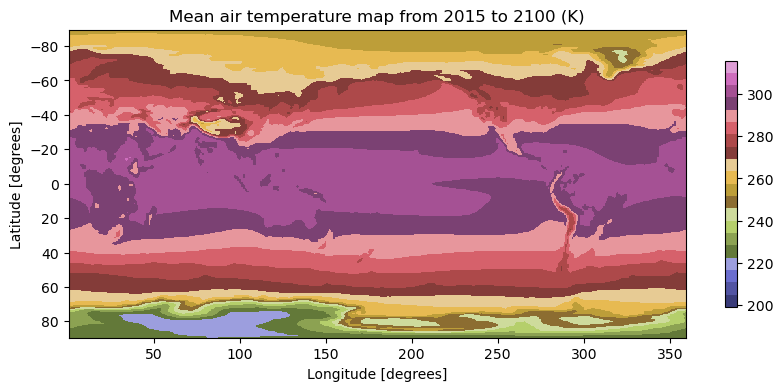

In [104]:
dset = xr.open_dataset('./data/tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc')
mat2 = np.mean(dset['tas'].sel(time=slice('20710101', '21000101')), axis=0)
plt.figure(figsize=(10,4))
# plt.imshow(mat2, cmap='jet', vmin=199, vmax=316,
plt.imshow(mat2, cmap='tab20b', vmin=199, vmax=316, 
           extent=[min(dset['lon'].values),
                  max(dset['lon'].values), 
                  min(dset['lat'].values),
                  max(dset['lat'].values)])
plt.gca().invert_yaxis()
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Mean air temperature map from 2015 to 2100 (K)')
plt.colorbar(shrink=0.8)

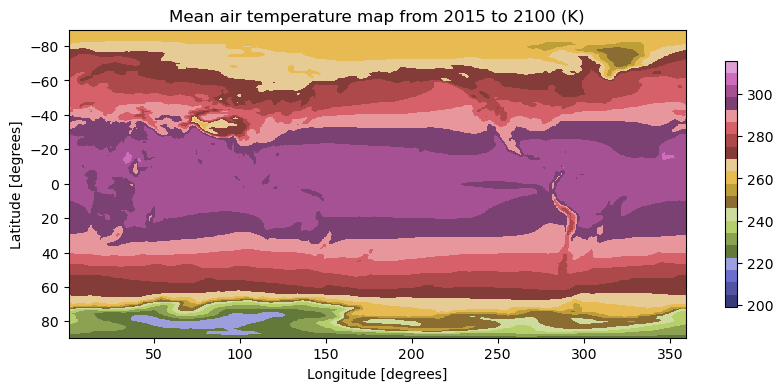

In [105]:
dset = xr.open_dataset('./data/tas_Amon_GFDL-ESM4_ssp245_r1i1p1f1_gr1_201501-210012.nc')
mat3 = np.mean(dset['tas'].sel(time=slice('20710101', '21000101')), axis=0)
plt.figure(figsize=(10,4))
# plt.imshow(mat3, cmap='jet', vmin=199, vmax=316, 
plt.imshow(mat3, cmap='tab20b', vmin=199, vmax=316, 
           extent=[min(dset['lon'].values),
                  max(dset['lon'].values), 
                  min(dset['lat'].values),
                  max(dset['lat'].values)])
plt.gca().invert_yaxis()
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Mean air temperature map from 2015 to 2100 (K)')
plt.colorbar(shrink=0.8)

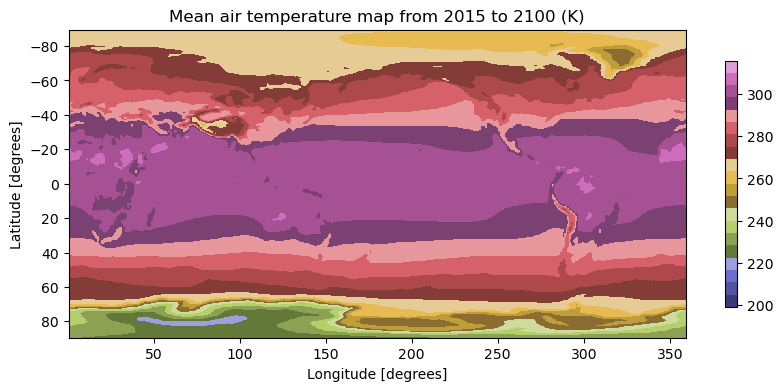

In [106]:
dset = xr.open_dataset('./data/tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_201501-210012.nc')
mat4 = np.mean(dset['tas'].sel(time=slice('20710101', '21000101')), axis=0)
plt.figure(figsize=(10,4))
# plt.imshow(mat4, cmap='jet', vmin=199, vmax=316,
plt.imshow(mat4, cmap='tab20b', vmin=199, vmax=316, 
           extent=[min(dset['lon'].values),
                  max(dset['lon'].values), 
                  min(dset['lat'].values),
                  max(dset['lat'].values)])
plt.gca().invert_yaxis()
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Mean air temperature map from 2015 to 2100 (K)')
plt.colorbar(shrink=0.8)

5. Based on Figure 2 of Beck et al. (2023), would you categorize your climate change projections as being on the hot end, the cold end, or relatively moderate?

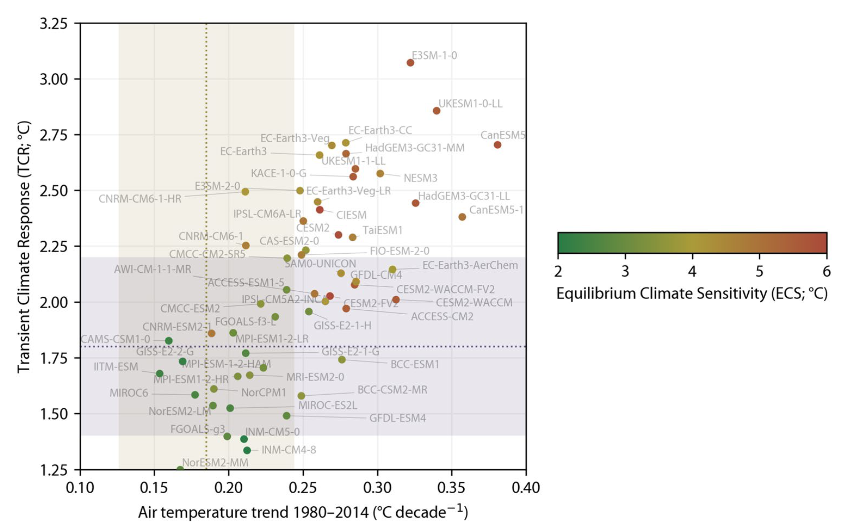

In [102]:
from IPython.display import Image, display
# Display the image
display(Image(filename='data/TCR_ECS.png')) 

In [121]:
# For the projection 1:
print(f"Transient Climate Response: {mat2.values.mean()-mat1.values.mean()} K")

# For the projection 2:
print(f"Transient Climate Response: {mat3.values.mean()-mat1.values.mean()} K")

# For the projection 3:
print(f"Transient Climate Response: {mat4.values.mean()-mat1.values.mean()} K")

Transient Climate Response: 1.143035888671875 K
Transient Climate Response: 2.497100830078125 K
Transient Climate Response: 4.00164794921875 K


Given this values, the projections 1, 2 and 3 correspond to a cold end projection, a relatively moderate projection and a hot end projection respectively.